In [1]:
import os
from google.cloud import bigquery
from google.auth import default
import pandas as pd
import numpy as np
import math
import seaborn as sns

# Creamos los permisos con la llave para ingresar a Google 
# activamos el servicio
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../Clave_Google/henry-sismos-a343182ba163.json"

project_id = 'your-project-id'
client = bigquery.Client(project=project_id)

In [2]:

# Obtiene las credenciales predeterminadas
credentials, project_id = default()

# Obtiene el correo electrónico del usuario autenticado
user_email = credentials.service_account_email

print(user_email)

henry-992@henry-sismos.iam.gserviceaccount.com


In [3]:

# Crea una instancia del cliente de BigQuery
client = bigquery.Client()

# Obtiene la lista de proyectos del usuario autenticado
projects = client.list_projects()

# Imprime los nombres de los proyectos
project_ids = []
for project in projects:
    project_ids.append(project.project_id) 
project_ids

['henry-sismos']

In [4]:
# Crea una instancia del cliente de BigQuery
client = bigquery.Client()

# Especifica el ID del proyecto
project_id = project_ids[0]


# Obtiene la lista de conjuntos de datos en el proyecto
datasets = client.list_datasets(project=project_id)

# Imprime los nombres de los conjuntos de datos
dataset_ids = []
for dataset in datasets:
    dataset_ids.append(dataset.dataset_id)
dataset_ids

['Sismos']

In [5]:

# Crea una instancia del cliente de BigQuery
client = bigquery.Client(project=project_id)

# Obtiene la referencia al conjunto de datos
dataset_ref = client.dataset(dataset_ids[0])

# Obtiene el conjunto de datos
dataset = client.get_dataset(dataset_ref)

# Obtiene la lista de tablas en el conjunto de datos
tables = client.list_tables(dataset)

# Imprime los nombres de las tablas

table_ids = []
for table in tables:
    table_ids.append(table.table_id)
table_ids

['Colombia',
 'Colombia_sismo',
 'Colombia_sismo_Dashboards',
 'EEUU_sismo',
 'EEUU_sismo_Dashboards',
 'Japan_sismo',
 'Japan_sismo_Dashboards']

In [6]:
# Creamos el DataFrame de  df_Colombia_sismo
# Crea una instancia del cliente de BigQuery
client = bigquery.Client(project= project_ids[0])

# Especifica el ID del dataset
dataset_id = dataset_ids[0]


table_ref = dataset_ref.table(table_ids[1])
# Descarga la tabla en un DataFrame
table = client.get_table(table_ref)
df_Colombia_sismo = client.list_rows(table).to_dataframe()
            
# Imprime las primeras filas del DataFrame
print(f"Creado el DataFrame de {table_ids[1]}")
print(df_Colombia_sismo.info())
df_Colombia_sismo.head(2)


Creado el DataFrame de Colombia_sismo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Fecha       404 non-null    datetime64[ns, UTC]
 1   Magnitud    404 non-null    float64            
 2   Intensidad  404 non-null    float64            
 3   GAP         404 non-null    float64            
 4   Latitud     404 non-null    float64            
 5   Longitud    404 non-null    float64            
 6   Hipocentro  404 non-null    float64            
 7   Lugar       404 non-null    object             
 8   Id          404 non-null    object             
 9   Region      404 non-null    object             
 10  Pais        404 non-null    object             
 11  Act         404 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(6), object(4)
memory usage: 38.0+ KB
None


,Fecha,Magnitud,Intensidad,GAP,Latitud,Longitud,Hipocentro,Lugar,Id,Region,Pais,Act
0,2019-05-12 07:28:08.579000+00:00,4.5,4.3,65.0,3.9341,-73.9292,10.00,"18 km NNW of Cubarral, Colombia",",us70003jzm,",Meta,CO,2023-07-10 00:00:00+00:00
1,2016-12-16 19:45:20.340000+00:00,4.5,2.0,65.0,3.3938,-74.2744,61.75,"25 km W of Mesetas, Colombia",",us200081nl,",Meta,CO,2023-07-10 00:00:00+00:00


In [7]:
# Creamos el DataFrame de  df_EEUU_sismo
# Crea una instancia del cliente de BigQuery
client = bigquery.Client(project= project_ids[0])

# Especifica el ID del dataset
dataset_id = dataset_ids[0]


table_ref = dataset_ref.table(table_ids[3])
# Descarga la tabla en un DataFrame
table = client.get_table(table_ref)
df_EEUU_sismo = client.list_rows(table).to_dataframe()
            
# Imprime las primeras filas del DataFrame
print(f"Creado el DataFrame de {table_ids[3]}")
print(df_EEUU_sismo.info())
df_EEUU_sismo.head(2)


Creado el DataFrame de EEUU_sismo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Fecha       3726 non-null   datetime64[ns, UTC]
 1   Magnitud    3726 non-null   float64            
 2   Intensidad  3726 non-null   float64            
 3   GAP         3726 non-null   float64            
 4   Latitud     3726 non-null   float64            
 5   Longitud    3726 non-null   float64            
 6   Hipocentro  3726 non-null   float64            
 7   Lugar       3726 non-null   object             
 8   Id          3726 non-null   object             
 9   Region      3726 non-null   object             
 10  Pais        3726 non-null   object             
 11  Act         3726 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(6), object(4)
memory usage: 349.4+ KB
None


,Fecha,Magnitud,Intensidad,GAP,Latitud,Longitud,Hipocentro,Lugar,Id,Region,Pais,Act
0,2021-06-30 20:24:23.394000+00:00,2.70,3.4,41.0,42.8255,-95.1057,10.00,"4 km E of Rembrandt, Iowa",",us7000ehtv,",Iowa,US,2023-07-10 00:00:00+00:00
1,2021-12-12 17:52:56.070000+00:00,3.04,5.0,89.0,38.6910,-83.5815,14.51,"2 km E of Manchester, Ohio",",us6000gbpp,se60140143,",Ohio,US,2023-07-10 00:00:00+00:00


In [8]:
# Creamos el DataFrame de  df_Japan_sismo
# Crea una instancia del cliente de BigQuery
client = bigquery.Client(project= project_ids[0])

# Especifica el ID del dataset
dataset_id = dataset_ids[0]


table_ref = dataset_ref.table(table_ids[5])


# Descarga la tabla en un DataFrame
table = client.get_table(table_ref)
df_Japan_sismo = client.list_rows(table).to_dataframe()
            
# Imprime las primeras filas del DataFrame
print(f"Creado el DataFrame de {table_ids[5]}")
print(df_Japan_sismo.info())
df_Japan_sismo.head(2)


Creado el DataFrame de Japan_sismo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Fecha       3055 non-null   datetime64[ns, UTC]
 1   Magnitud    3055 non-null   float64            
 2   Intensidad  3055 non-null   float64            
 3   GAP         3055 non-null   float64            
 4   Latitud     3055 non-null   float64            
 5   Longitud    3055 non-null   float64            
 6   Hipocentro  3055 non-null   float64            
 7   Lugar       3055 non-null   object             
 8   Id          3055 non-null   object             
 9   Region      3055 non-null   object             
 10  Pais        3055 non-null   object             
 11  Act         3055 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(6), object(4)
memory usage: 286.5+ KB
None


,Fecha,Magnitud,Intensidad,GAP,Latitud,Longitud,Hipocentro,Lugar,Id,Region,Pais,Act
0,2019-07-27 18:31:07.540000+00:00,6.3,6.2,14.0,33.1492,137.3029,367.0,"138 km ESE of Shing?, Japan",",us60004wjb,",Mie,JP,2023-07-10 00:00:00+00:00
1,2007-04-15 03:19:30.390000+00:00,5.1,7.5,104.5,34.8070,136.2390,15.7,"11 km ENE of Ueno-ebisumachi, Japan",",us2007beaf,atlas20070415031900,atlas200704150...",Mie,JP,2023-07-10 00:00:00+00:00


In [9]:
# Unificamos la data y ordenamos por fecha
df_paises_sismos = pd.concat([df_Colombia_sismo, df_Japan_sismo, df_EEUU_sismo], ignore_index=True)

# se dejan las columnas con rangos numericos

df_paises_sismos = df_paises_sismos.drop([ "Lugar", "Fecha",  "Id", "Region", "Pais", "Act"], axis= 1)

# Ajustamos el GAP de 0 a 180 grados
df_paises_sismos["GAP"] =  df_paises_sismos["GAP"].apply(lambda x: x if x <= 180 else 360 - x)

# Mostramos el resultado
print(df_paises_sismos.info())
df_paises_sismos.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7185 entries, 0 to 7184
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Magnitud    7185 non-null   float64
 1   Intensidad  7185 non-null   float64
 2   GAP         7185 non-null   float64
 3   Latitud     7185 non-null   float64
 4   Longitud    7185 non-null   float64
 5   Hipocentro  7185 non-null   float64
dtypes: float64(6)
memory usage: 336.9 KB
None


,Magnitud,Intensidad,GAP,Latitud,Longitud,Hipocentro
0,4.5,4.3,65.0,3.9341,-73.9292,10.00
1,4.5,2.0,65.0,3.3938,-74.2744,61.75
2,5.0,2.0,31.0,3.9157,-71.3594,10.00
3,5.0,4.3,65.0,3.4190,-73.9867,10.00
4,6.0,6.7,36.0,3.5359,-74.0176,11.00


### 1- Categorizamos en una nueva columna llamada "Niv-Inten", los valores de la columnas "Intensidad"

### Magnitud
La escala de Richter agrupa los sismos en diferentes categorías o niveles de intensidad basados en la amplitud de las ondas sísmicas registradas en una estación sísmica específica. A continuación, se muestra una clasificación general de la escala de Richter:<br><br>

Menos de 2.0: Generalmente no se percibe, excepto en condiciones muy favorables.
2.0 a 3.9: A menudo se percibe, pero rara vez causa daños.
4.0 a 4.9: Se siente como un temblor de vibración menor, similar a la de un camión que pasa. Raramente causa daños.
5.0 a 5.9: Puede causar daños significativos en edificios y estructuras mal construidas en áreas pobladas.
6.0 a 6.9: Puede causar una gran cantidad de daños en áreas habitadas en un rango de hasta unos 160 kilómetros alrededor del epicentro.
7.0 a 7.9: Puede causar daños graves en áreas más grandes.
8.0 o superior: Un terremoto de esta magnitud puede causar daños devastadores en áreas extensas.

La categorización real de la escala de Intensidad es:<br><br>

I. No se siente.<br>
II. Se siente solo por unas pocas personas en reposo y en posición tranquila.<br>
III. Se siente dentro de los edificios, especialmente en los pisos superiores.<br>
IV. Se siente como un camión pesado que pasa cerca o como una vibración similar al paso de un tren.<br>
V. Se siente ampliamente en el área afectada. Los objetos colgantes pueden oscilar y se pueden escuchar ruidos.<br>
VI. Se siente por todas las personas. Los objetos frágiles se rompen y se pueden producir grietas en las paredes.<br>
VII. Daños menores en las estructuras, como grietas en los muros y caída de revestimientos.<br>
VIII. Daños importantes en las estructuras, como colapso parcial de edificios y chimeneas.<br>
IX. Daños severos en las estructuras, con colapso parcial generalizado.<br>
X. Daños extensos en las estructuras, con colapso de muchos edificios.<br>
XI. Daños de gran alcance, con colapso de la mayoría de los edificios.<br>
XII. Daño total. Las estructuras se desploman y el terreno puede agrietarse y deformarse.<br>

### 2- Clasificacion del GAP

GAP < 30: Excelente<br>
30 ≤ GAP < 60: Buena<br>
60 ≤ GAP < 90: Razonable<br>
90 ≤ GAP < 120: Pobre<br>
GAP ≥ 120: Muy pobre<br>


* Excelente: Cobertura angular óptima, alta precisión en la ubicación y estimación de la magnitud del terremoto.
* Buena: Cobertura angular adecuada, buena precisión en la ubicación y estimación de la magnitud del terremoto.
* Razonable: Cobertura angular aceptable, precisión razonable en la ubicación y estimación de la magnitud del terremoto.
* Pobre: Cobertura angular deficiente, precisión reducida en la ubicación y estimación de la magnitud del terremoto.
* Muy pobre: Cobertura angular muy deficiente, baja precisión en la ubicación y estimación de la magnitud del terremoto.

# Empezamos Trabajos de Machine Learning  

kmins o dbscan

### 1- Identificación de la data a trabajar

In [10]:

df_MAc_Ler = df_paises_sismos[["Intensidad","Magnitud"]]
df_MAc_Ler.head(5)
df_MAc_Ler.to_csv("data.csv")

# K-Means

## Se Evalua por Distancia media al Centroide y Silhouette

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


X = df_MAc_Ler

# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
K = np.arange(2,10)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km = km.fit(X)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X.shape[0])
    Sum_of_squared_distances.append(distancia_media)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X, etiquetas)
    lista_sil.append(valor_medio_sil)

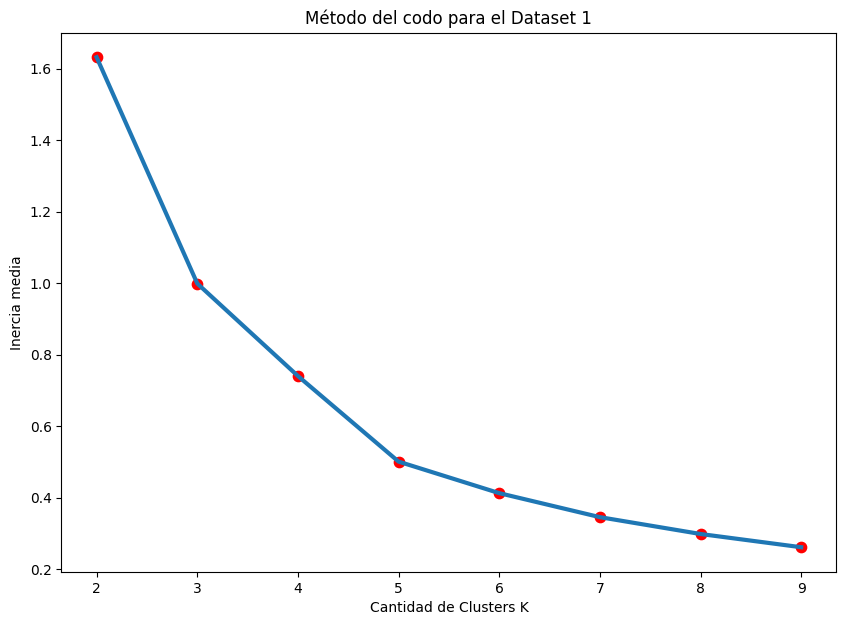

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()

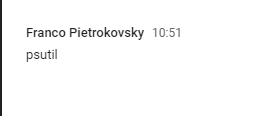

In [13]:
import pandas as pd
from sklearn.cluster import KMeans



# Crea el modelo de clustering con K-Means
k = 5  # Número de clústeres que deseas obtener
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
kmeans.fit(df_MAc_Ler)


KMeans(n_clusters=5, n_init=10, random_state=1)

In [14]:

# Asigna las etiquetas de los clústeres a cada instancia en el dataframe utilizando "loc"
pd.options.mode.chained_assignment = None
df_MAc_Ler.loc[:, 'cluster_label'] = kmeans.labels_.reshape(-1, 1)

# Muestra el dataframe con las etiquetas de clúster asignadas
print(df_MAc_Ler)


      Intensidad  Magnitud  cluster_label
0            4.3      4.50              0
1            2.0      4.50              2
2            2.0      5.00              2
3            4.3      5.00              0
4            6.7      6.00              4
...          ...       ...            ...
7180         5.4      3.27              3
7181         5.2      3.60              3
7182         6.2      2.76              3
7183         4.1      2.90              3
7184         1.0      2.60              1

[7185 rows x 3 columns]


In [15]:
mes_letras= [
    df_paises_sismos["Magnitud"] <= 4,
    df_paises_sismos["Magnitud"] > 4
    ]
opciones_mes_letras = ["Medio Bajo", "Medio Alto"]

df_MAc_Ler["Niv-Mag"] = np.select(mes_letras, opciones_mes_letras)

mes_letras= [
    df_paises_sismos["Intensidad"] <=3,
    df_paises_sismos["Intensidad"] <=6,
    df_paises_sismos["Intensidad"] > 6]
opciones_mes_letras = ["Bajo", "Moderado", "Alto"]
df_MAc_Ler["Niv-Inten"] = np.select(mes_letras, opciones_mes_letras)

df_MAc_Ler


,Intensidad,Magnitud,cluster_label,Niv-Mag,Niv-Inten
0,4.3,4.50,0,Medio Alto,Moderado
1,2.0,4.50,2,Medio Alto,Bajo
2,2.0,5.00,2,Medio Alto,Bajo
3,4.3,5.00,0,Medio Alto,Moderado
4,6.7,6.00,4,Medio Alto,Alto
...,...,...,...,...,...
7180,5.4,3.27,3,Medio Bajo,Moderado
7181,5.2,3.60,3,Medio Bajo,Moderado
7182,6.2,2.76,3,Medio Bajo,Alto
7183,4.1,2.90,3,Medio Bajo,Moderado


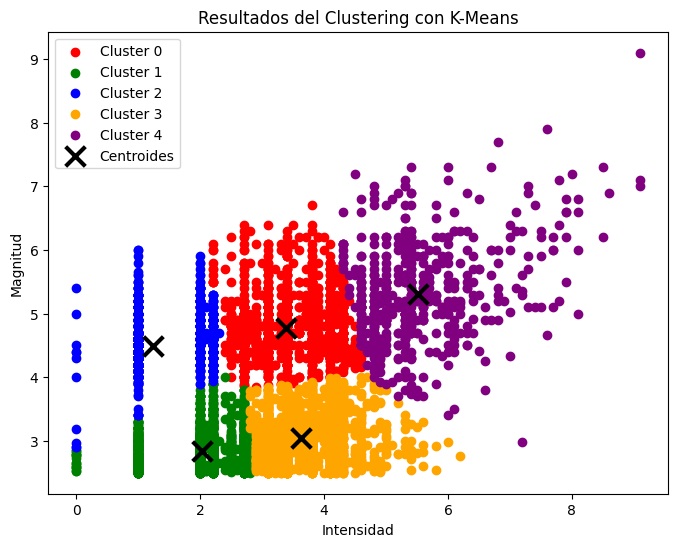

In [16]:
# Gráfica de CLÚSTERES
import matplotlib.pyplot as plt

# Variables que deseas visualizar en el diagrama de dispersión
x_variable = 'Intensidad'
y_variable = 'Magnitud'

# Colores para cada clúster
#colors = ['red', 'green', 'blue', 'orange' ]
colors = ['red', 'green', 'blue', 'orange', 'purple', "black", "Brown", "Pink", "Yellow","Gray" ]

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
for cluster_label in range(k):
    cluster_data = df_MAc_Ler[df_MAc_Ler['cluster_label'] == cluster_label]
    plt.scatter(cluster_data[x_variable], cluster_data[y_variable], color=colors[cluster_label], label=f'Cluster {cluster_label}')


# Mostrar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', s=200, linewidths=3, label='Centroides')

# Configurar el título y las etiquetas de los ejes
plt.title('Resultados del Clustering con K-Means')
plt.xlabel(x_variable)
plt.ylabel(y_variable)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [17]:
condicion = df_MAc_Ler["cluster_label"] == 0
filas_cumplen_condicion = df_MAc_Ler[condicion]
print(filas_cumplen_condicion["Niv-Inten"].value_counts())
print(filas_cumplen_condicion["Niv-Mag"].value_counts())
print('-------------------------------------------')
print(filas_cumplen_condicion["Niv-Inten"].unique())
print('-------------------------------------------')
filas_cumplen_condicion.describe()

"""
Los sismos en este rango tienen una intensidad perceptible 
que va desde niveles bajos hasta niveles ampliamente perceptibles en el área afectada. 
Pueden provocar daños menores en estructuras, 
como grietas en los muros y caída de revestimientos, 
y ser percibidos por un número variable de personas, 
desde unas pocas en reposo y en posición tranquila 
hasta todas las personas en el área afectada.
"""

Niv-Inten
Moderado    1170
Bajo         391
Name: count, dtype: int64
Niv-Mag
Medio Alto    1511
Medio Bajo      50
Name: count, dtype: int64
-------------------------------------------
['Moderado' 'Bajo']
-------------------------------------------


'\nLos sismos en este rango tienen una intensidad perceptible \nque va desde niveles bajos hasta niveles ampliamente perceptibles en el área afectada. \nPueden provocar daños menores en estructuras, \ncomo grietas en los muros y caída de revestimientos, \ny ser percibidos por un número variable de personas, \ndesde unas pocas en reposo y en posición tranquila \nhasta todas las personas en el área afectada.\n'

In [18]:
condicion = df_MAc_Ler["cluster_label"] == 1
filas_cumplen_condicion = df_MAc_Ler[condicion]
print(filas_cumplen_condicion["Niv-Inten"].value_counts())
print(filas_cumplen_condicion["Niv-Mag"].value_counts())
print('-------------------------------------------')
print(filas_cumplen_condicion["Niv-Inten"].unique())
print('-------------------------------------------')
filas_cumplen_condicion.describe()

"""
Los sismos en este rango tienen una intensidad que generalmente no se percibe, 
excepto en condiciones muy favorables, 
hasta niveles que a menudo se perciben, 
pero rara vez causan daños. 
En términos de magnitud, 
van desde temblores que se sienten como vibraciones menores 
hasta sismos que pueden causar daños menores en estructuras.
"""

Niv-Inten
Bajo    1740
Name: count, dtype: int64
Niv-Mag
Medio Bajo    1740
Name: count, dtype: int64
-------------------------------------------
['Bajo']
-------------------------------------------


'\nLos sismos en este rango tienen una intensidad que generalmente no se percibe, \nexcepto en condiciones muy favorables, \nhasta niveles que a menudo se perciben, \npero rara vez causan daños. \nEn términos de magnitud, \nvan desde temblores que se sienten como vibraciones menores \nhasta sismos que pueden causar daños menores en estructuras.\n'

In [19]:
condicion = df_MAc_Ler["cluster_label"] == 2
filas_cumplen_condicion = df_MAc_Ler[condicion]
print(filas_cumplen_condicion["Niv-Inten"].value_counts())
print(filas_cumplen_condicion["Niv-Mag"].value_counts())
print('-------------------------------------------')
print(filas_cumplen_condicion["Niv-Inten"].unique())
print('-------------------------------------------')
filas_cumplen_condicion.describe()

"""

los sismos en este rango tienen una intensidad que generalmente no se percibe, 
pero que en condiciones favorables puede ser percibida por unas pocas personas en reposo 
y en posición tranquila. 
Además, la magnitud de estos sismos va desde temblores de vibración menor 
hasta la capacidad de causar una gran cantidad de daños en áreas habitadas.

"""


Niv-Inten
Bajo    1658
Name: count, dtype: int64
Niv-Mag
Medio Alto    1564
Medio Bajo      94
Name: count, dtype: int64
-------------------------------------------
['Bajo']
-------------------------------------------


'\n\nlos sismos en este rango tienen una intensidad que generalmente no se percibe, \npero que en condiciones favorables puede ser percibida por unas pocas personas en reposo \ny en posición tranquila. \nAdemás, la magnitud de estos sismos va desde temblores de vibración menor \nhasta la capacidad de causar una gran cantidad de daños en áreas habitadas.\n\n'

In [20]:
condicion = df_MAc_Ler["cluster_label"] == 3
filas_cumplen_condicion = df_MAc_Ler[condicion]

print(filas_cumplen_condicion["Niv-Inten"].value_counts())
print(filas_cumplen_condicion["Niv-Mag"].value_counts())
print('-------------------------------------------')
print(filas_cumplen_condicion["Niv-Inten"].unique())
print('-------------------------------------------')
filas_cumplen_condicion.describe()

"""
los sismos en este rango tienen una intensidad que a menudo se percibe 
y puede causar una gran cantidad de daños en áreas habitadas, 
junto con una magnitud que va desde temblores menores 
hasta la capacidad de causar daños significativos en estructuras.
"""

Niv-Inten
Moderado    1600
Bajo          82
Alto           1
Name: count, dtype: int64
Niv-Mag
Medio Bajo    1683
Name: count, dtype: int64
-------------------------------------------
['Moderado' 'Bajo' 'Alto']
-------------------------------------------


'\nlos sismos en este rango tienen una intensidad que a menudo se percibe \ny puede causar una gran cantidad de daños en áreas habitadas, \njunto con una magnitud que va desde temblores menores \nhasta la capacidad de causar daños significativos en estructuras.\n'

In [21]:
condicion = df_MAc_Ler["cluster_label"] == 4
filas_cumplen_condicion = df_MAc_Ler[condicion]

print(filas_cumplen_condicion["Niv-Inten"].value_counts())
print(filas_cumplen_condicion["Niv-Mag"].value_counts())
print('-------------------------------------------')
print(filas_cumplen_condicion["Niv-Inten"].unique())
print('-------------------------------------------')
filas_cumplen_condicion.describe()

"""
los sismos en este rango tienen una intensidad 
que puede causar daños significativos en áreas más grandes 
y una magnitud que va desde la capacidad de causar daños significativos
 en estructuras hasta la posibilidad de ocasionar daños extensos 
 e incluso colapso total de edificios.
"""

Niv-Inten
Moderado    429
Alto        114
Name: count, dtype: int64
Niv-Mag
Medio Alto    523
Medio Bajo     20
Name: count, dtype: int64
-------------------------------------------
['Alto' 'Moderado']
-------------------------------------------


'\nlos sismos en este rango tienen una intensidad \nque puede causar daños significativos en áreas más grandes \ny una magnitud que va desde la capacidad de causar daños significativos\n en estructuras hasta la posibilidad de ocasionar daños extensos \n e incluso colapso total de edificios.\n'

In [22]:
import pickle

# Guarda el modelo en un archivo
filename = 'kmeans_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(kmeans, file)


Le pasmos un archivo csv para generar la columna con el nuevo cluster

In [23]:
import pandas as pd
import pickle

# Carga el modelo desde el archivo
filename = 'kmeans_model.pkl'
with open(filename, 'rb') as file:
    kmeans_loaded = pickle.load(file)

# Carga los nuevos datos desde un archivo CSV
nuevos_datos = pd.read_csv('data.csv')

# Elimina la columna "Unnamed: 0" de los nuevos datos
nuevos_datos = nuevos_datos.drop("Unnamed: 0", axis=1)

# Aplica el modelo a los nuevos datos
labels_pred = kmeans_loaded.predict(nuevos_datos)

# Imprime las etiquetas predichas
print(labels_pred)
nuevos_datos["cluster_label"] = labels_pred
nuevos_datos["cluster_label1"] = df_MAc_Ler["cluster_label"]
nuevos_datos


[0 2 2 ... 3 3 1]


,Intensidad,Magnitud,cluster_label,cluster_label1
0,4.3,4.50,0,0
1,2.0,4.50,2,2
2,2.0,5.00,2,2
3,4.3,5.00,0,0
4,6.7,6.00,4,4
...,...,...,...,...
7180,5.4,3.27,3,3
7181,5.2,3.60,3,3
7182,6.2,2.76,3,3
7183,4.1,2.90,3,3


Le pasamos simplemente datos nuevos de Intensidad y Magnitud

In [24]:
import pandas as pd
import pickle

# Carga el modelo desde el archivo
filename = 'kmeans_model.pkl'
filename = "../Machine_Learning/kmeans_model.pkl"
with open(filename, 'rb') as file:
    kmeans_loaded = pickle.load(file)

# Crea un DataFrame con los nuevos datos
nuevos_datos = pd.DataFrame({'Intensidad': [4.3], 'Magnitud': [4.5]})

# Aplica el modelo a los nuevos datos
labels_pred = kmeans_loaded.predict(nuevos_datos)

# Imprime las etiquetas predichas
print(labels_pred)

[0]
